In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import pylab as pl
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.read_csv('CropDataset.csv')

In [4]:
df['label(crop)'] = pd.factorize(df['label(crop)'])[0]

In [5]:
len(df['label(crop)'].unique())

22

In [6]:
# Feature selection
X_df = df.drop('label(crop)', axis=1)
y_df = df.iloc[:,-1:]

In [7]:
feature_names = X_df.columns

In [8]:
X = X_df.values
y = y_df.values
y = y.flatten()

## Decision Tree

In [9]:
DecisionTree = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=7)

In [10]:
clf = DecisionTreeClassifier(random_state=101)
model = clf.fit(X, y)

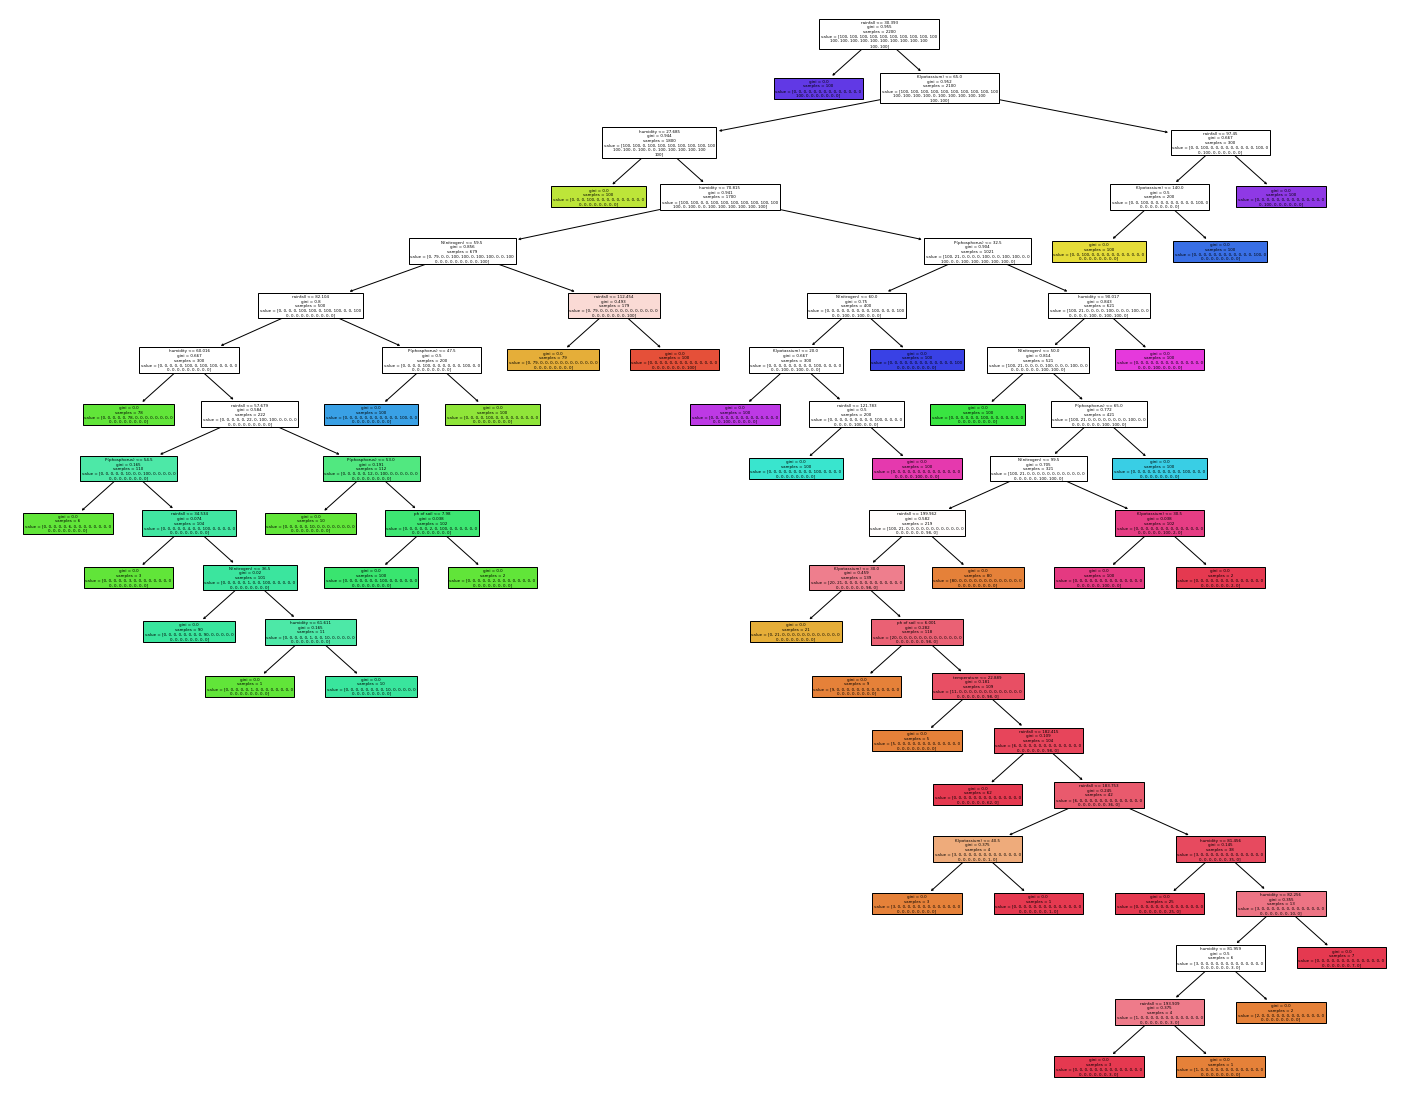

In [11]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,
                   filled=True)

# Split dataset, normalize and reduce features

In [12]:
pca = PCA(n_components=2).fit(X)
X = pca.transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True)

In [14]:
#Normalize the features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Support Vector Machine

In [15]:
svc = SVC(C = 10, gamma = 0.01, kernel = 'rbf')

In [16]:
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [17]:
y_pred = svc.predict(X_test)

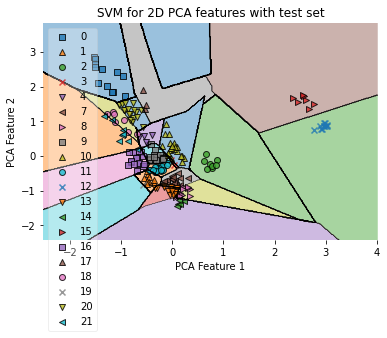

In [18]:
# Plotting decision regions
plot_decision_regions(X_test, y_pred, clf=svc, legend=2)

# Adding axes annotations
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('SVM for 2D PCA features with test set')

plt.show()

## Random Forest

In [19]:
forest = RandomForestClassifier(n_estimators=20, random_state=101).fit(X_train, y_train)

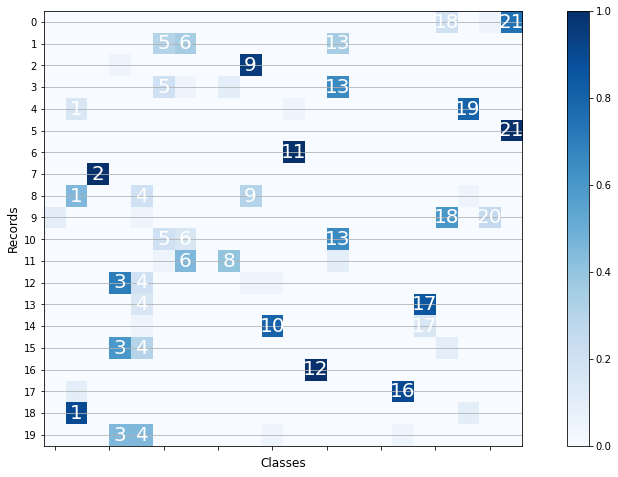

In [20]:
pred = forest.predict_proba(X_test)[:20]
fig, ax = plt.subplots(figsize= (20,8))
im = ax.imshow(pred, cmap='Blues')

ax.grid(axis='y')
ax.set_xticklabels([])

ax.set_yticks(np.arange(pred.shape[0]))

plt.ylabel('Records', fontsize='large')
plt.xlabel('Classes', fontsize='large')
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04) 

for i in range(pred.shape[0]):
    for j in range(22):
        if pred[i, j] >.1:
             ax.text(j, i, j,
                       ha="center", va="center", color="w", fontsize=20)

# K-NN Classifier

In [21]:
knn=KNeighborsClassifier(n_neighbors=6,algorithm='ball_tree')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6)

In [22]:
y_pred = knn.predict(X_test)

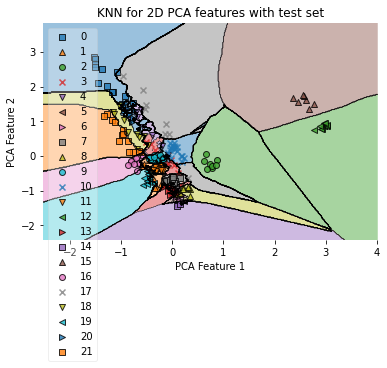

In [23]:
plot_decision_regions(X_test, y_pred, clf=knn, legend=2)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('KNN for 2D PCA features with test set')
plt.show()

## Splitting Ratio

In [24]:
seed = 101
kfold = model_selection.KFold(n_splits=20, random_state=seed, shuffle=True)

## Ensembling

In [25]:
estimators = []
estimators.append(('Desicion Tree', DecisionTree))
estimators.append(('SVM', svc))
estimators.append(('Random Forest', forest))
estimators.append(('kneighbors', knn))

In [26]:
features = df[['N(nitrogen)', 'P(phosphorus)', 'K(potassium)', 'temperature',
       'humidity', 'ph of soil', 'rainfall']]
target = df['label']
labels = df['label']

KeyError: 'label'

In [2]:
ensemble = VotingClassifier(estimators,voting='hard')
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)

NameError: name 'VotingClassifier' is not defined

In [3]:
print(results.mean())

NameError: name 'results' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target, test_size = 0.25, random_state=101)


In [ ]:
ensemble.fit(Xtrain,Ytrain)
ensemble.score(Xtest,Ytest)

In [ ]:
ensemble.predict(Xtest)

In [1]:
model.save("ensemble_model.h5")

NameError: name 'model' is not defined